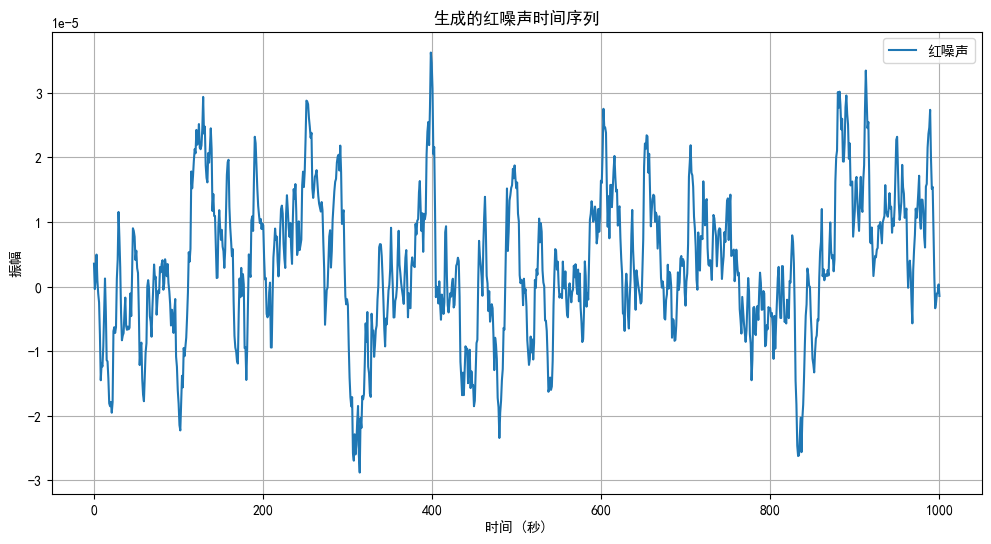

C:\Users\tk\AppData\Local\Temp\ipykernel_17436\1169954947.py:12: RuntimeWarning: divide by zero encountered in power
  return P0 / (1 + (f / fc) ** q)
C:\Users\tk\AppData\Local\Temp\ipykernel_17436\1169954947.py:12: RuntimeWarning: overflow encountered in power
  return P0 / (1 + (f / fc) ** q)
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u22

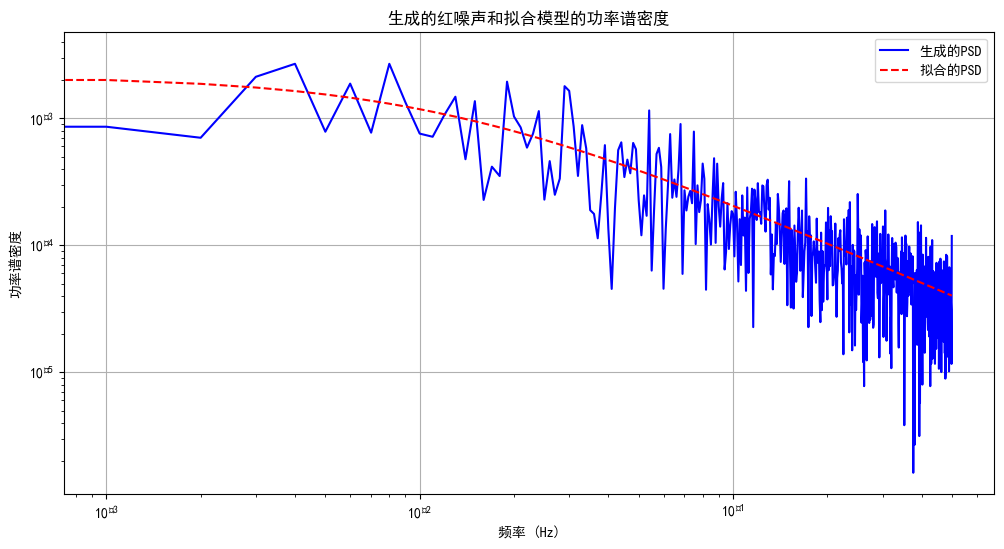

模型拟合R方值: 0.6678
模型拟合R方值: 0.6678


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft, fftfreq

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 第一步：定义红噪声的功率谱密度模型
def power_spectral_density(f, P0, fc, q):
    """计算红噪声的功率谱密度。"""
    return P0 / (1 + (f / fc) ** q)

# 第二步：根据PSD生成红噪声时间序列
def generate_red_noise(T, sampling_rate, P0, fc, q):
    """基于给定的PSD参数生成红噪声时间序列。"""
    N = T * sampling_rate  # 采样点数
    f = fftfreq(N, d=1/sampling_rate)  # 频率数组
    psd = power_spectral_density(np.abs(f), P0, fc, q)  # 计算每个频率的PSD

    # 基于PSD的随机相位和振幅
    amplitude = np.sqrt(psd) * np.random.normal(0, 1, N)
    phase = 2 * np.pi * np.random.rand(N)
    noise_freq = amplitude * np.exp(1j * phase)  # 复数频域信号

    # 逆傅里叶变换得到时域信号
    red_noise = np.real(ifft(noise_freq))
    return red_noise

# 第三步：定义参数和时间范围
T = 1000  # 持续时间（秒）
sampling_rate = 1  # 采样率（Hz，每秒一个样本）
P0 = 1e-5  # 红噪声强度的初始猜测值
fc = 0.01  # 拐角频率
q = 2  # 谱指数

# 生成合成红噪声
red_noise = generate_red_noise(T, sampling_rate, P0, fc, q)
time = np.linspace(0, T, T)

# 绘制生成的红噪声
plt.figure(figsize=(12, 6))
plt.plot(time, red_noise, label='红噪声')
plt.title("生成的红噪声时间序列")
plt.xlabel("时间 (秒)")
plt.ylabel("振幅")
plt.legend()
plt.grid(True)
plt.show()

# 第五步：定义最小二乘拟合的模型函数
def red_noise_model(frequencies, P0, fc, q):
    """用于曲线拟合的模型函数。"""
    return power_spectral_density(frequencies, P0, fc, q)

# 第六步：将PSD拟合到生成的数据
frequencies = fftfreq(T, d=1/sampling_rate)[:T//2]  # 正频率
psd_generated = np.abs(fft(red_noise))[:T//2]  # 生成的红噪声的PSD

# 参数的初始猜测值
initial_guess = [1e-5, 0.01, 2]

# 曲线拟合以匹配生成的PSD
params, _ = curve_fit(red_noise_model, frequencies, psd_generated, p0=initial_guess)

# 第七步：绘制生成的和拟合的PSD
fitted_psd = red_noise_model(frequencies, *params)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, psd_generated, label="生成的PSD", color='blue', linewidth=1.5)
plt.plot(frequencies, fitted_psd, label="拟合的PSD", color='red', linestyle='--', linewidth=1.5)
plt.title("生成的红噪声和拟合模型的功率谱密度")
plt.xlabel("频率 (Hz)")
plt.ylabel("功率谱密度")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# 第八步：计算R方以评估模型拟合
def r_squared(y_true, y_pred):
    """计算模型拟合评估的R方值。"""
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

r2 = r_squared(psd_generated, fitted_psd)
print(f"模型拟合R方值: {r2:.4f}")
print(f"模型拟合R方值: {r2:.4f}")